In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Load and preprocess the MNIST dataset
mnist = load_digits()
X_mnist, y_mnist = mnist.data, mnist.target

# Split the data into training and test sets
X_mnist_train, X_mnist_test, y_mnist_train, y_mnist_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Further split the training data into new training and validation sets
X_mnist_train, X_mnist_val, y_mnist_train, y_mnist_val = train_test_split(X_mnist_train, y_mnist_train, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_mnist_train = scaler.fit_transform(X_mnist_train)
X_mnist_val = scaler.transform(X_mnist_val)
X_mnist_test = scaler.transform(X_mnist_test)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_mnist_train = encoder.fit_transform(y_mnist_train.reshape(-1, 1))
y_mnist_val = encoder.transform(y_mnist_val.reshape(-1, 1))
y_mnist_test = encoder.transform(y_mnist_test.reshape(-1, 1))


/Users/robertnasuti/.local/share/virtualenvs/MultiLayerPerceptron-cyc80dTD/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Train the model using sigmoid

Epoch 1/500
36/36 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.1088 - val_loss: 0.2383 - val_accuracy: 0.0729
Epoch 2/500
36/36 [==============================] - 0s 893us/step - loss: 0.2342 - accuracy: 0.1097 - val_loss: 0.2283 - val_accuracy: 0.0799
Epoch 3/500
36/36 [==============================] - 0s 824us/step - loss: 0.2245 - accuracy: 0.1097 - val_loss: 0.2189 - val_accuracy: 0.0868
Epoch 4/500
36/36 [==============================] - 0s 790us/step - loss: 0.2153 - accuracy: 0.1097 - val_loss: 0.2101 - val_accuracy: 0.0868
Epoch 5/500
36/36 [==============================] - 0s 836us/step - loss: 0.2066 - accuracy: 0.1097 - val_loss: 0.2017 - val_accuracy: 0.0868
Epoch 6/500
36/36 [==============================] - 0s 818us/step - loss: 0.1985 - accuracy: 0.1097 - val_loss: 0.1939 - val_accuracy: 0.0868
Epoch 7/500
36/36 [==============================] - 0s 807us/step - loss: 0.1909 - accuracy: 0.1097 - val_loss: 0.1866 - val_accuracy: 0.0903
E

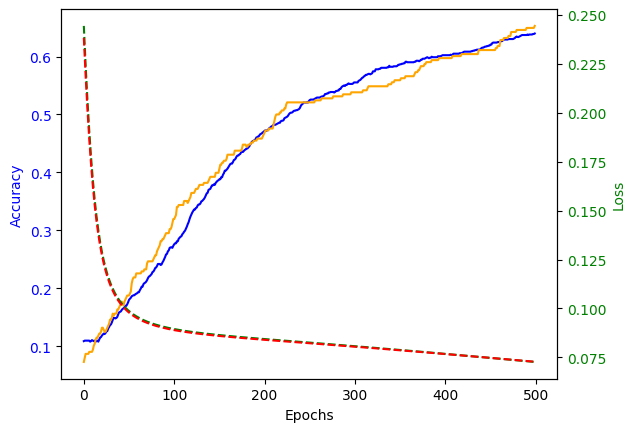

In [4]:
# Define the model
mnist_model = Sequential([
    Dense(32, input_shape=(64,), activation='sigmoid'),  # hidden layer with 32 neurons and ReLU activation
    Dense(10, activation='sigmoid')  # output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
mnist_model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
mnist_history = mnist_model.fit(X_mnist_train, y_mnist_train, validation_data=(X_mnist_val, y_mnist_val), epochs=500)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot training and validation accuracy
ax1.plot(mnist_history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(mnist_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(mnist_history.history['loss'], label='Training Loss', linestyle='--', color='green')
ax2.plot(mnist_history.history['val_loss'], label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Evaluate the model on MNIST
mnist_accuracy = mnist_model.evaluate(X_mnist_test, y_mnist_test)[1]
print(f"Accuracy on MNIST: {mnist_accuracy}")

# Train the model using RelU

Epoch 1/500
36/36 [==============================] - 0s 2ms/step - loss: 0.6037 - accuracy: 0.0696 - val_loss: 0.3282 - val_accuracy: 0.0729
Epoch 2/500
36/36 [==============================] - 0s 881us/step - loss: 0.3304 - accuracy: 0.0714 - val_loss: 0.2258 - val_accuracy: 0.0799
Epoch 3/500
36/36 [==============================] - 0s 906us/step - loss: 0.2314 - accuracy: 0.0748 - val_loss: 0.1818 - val_accuracy: 0.0764
Epoch 4/500
36/36 [==============================] - 0s 825us/step - loss: 0.1845 - accuracy: 0.0809 - val_loss: 0.1587 - val_accuracy: 0.0729
Epoch 5/500
36/36 [==============================] - 0s 831us/step - loss: 0.1587 - accuracy: 0.0896 - val_loss: 0.1447 - val_accuracy: 0.0868
Epoch 6/500
36/36 [==============================] - 0s 813us/step - loss: 0.1431 - accuracy: 0.0879 - val_loss: 0.1354 - val_accuracy: 0.0833
Epoch 7/500
36/36 [==============================] - 0s 813us/step - loss: 0.1330 - accuracy: 0.0923 - val_loss: 0.1290 - val_accuracy: 0.0799
E

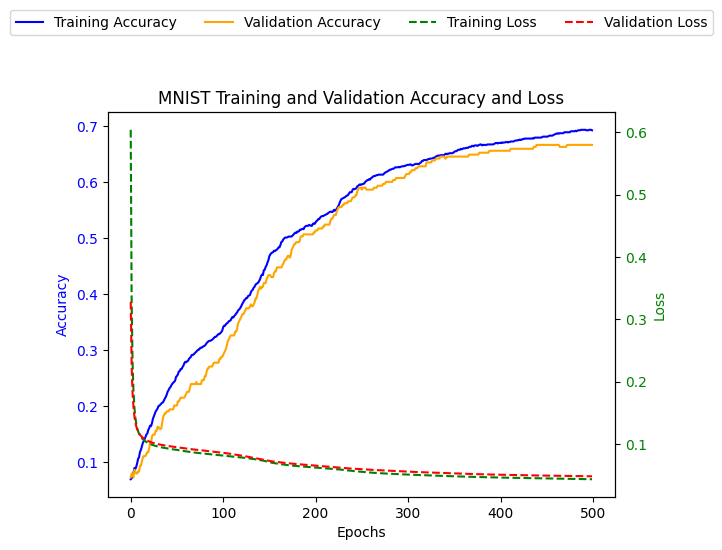

12/12 [==============================] - 0s 559us/step - loss: 0.0430 - accuracy: 0.7389
Accuracy on MNIST: 0.7388888597488403


In [18]:
# Define the model
mnist_model = Sequential([
    Dense(32, input_shape=(64,), activation='relu', kernel_initializer='he_normal'),  
    Dense(10, activation='relu', kernel_initializer='he_normal')  
])

# Compile the model
mnist_model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
mnist_history = mnist_model.fit(X_mnist_train, y_mnist_train, validation_data=(X_mnist_val, y_mnist_val), epochs=500)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot training and validation accuracy
ax1.plot(mnist_history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(mnist_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(mnist_history.history['loss'], label='Training Loss', linestyle='--', color='green')
ax2.plot(mnist_history.history['val_loss'], label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Add a title and a legend
plt.title('MNIST Training and Validation Accuracy and Loss')
fig.tight_layout()  # Adjust the layout
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)
plt.show()

# Evaluate the model on MNIST
mnist_accuracy = mnist_model.evaluate(X_mnist_test, y_mnist_test)[1]
print(f"Accuracy on MNIST: {mnist_accuracy}")

# Training the model using TanH

Epoch 1/500
36/36 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.1184 - val_loss: 0.4254 - val_accuracy: 0.1354
Epoch 2/500
36/36 [==============================] - 0s 905us/step - loss: 0.4285 - accuracy: 0.1192 - val_loss: 0.4237 - val_accuracy: 0.1389
Epoch 3/500
36/36 [==============================] - 0s 869us/step - loss: 0.4267 - accuracy: 0.1201 - val_loss: 0.4219 - val_accuracy: 0.1389
Epoch 4/500
36/36 [==============================] - 0s 840us/step - loss: 0.4248 - accuracy: 0.1201 - val_loss: 0.4202 - val_accuracy: 0.1389
Epoch 5/500
36/36 [==============================] - 0s 839us/step - loss: 0.4229 - accuracy: 0.1210 - val_loss: 0.4184 - val_accuracy: 0.1389
Epoch 6/500
36/36 [==============================] - 0s 793us/step - loss: 0.4211 - accuracy: 0.1210 - val_loss: 0.4167 - val_accuracy: 0.1389
Epoch 7/500
36/36 [==============================] - 0s 814us/step - loss: 0.4193 - accuracy: 0.1210 - val_loss: 0.4150 - val_accuracy: 0.1424
E

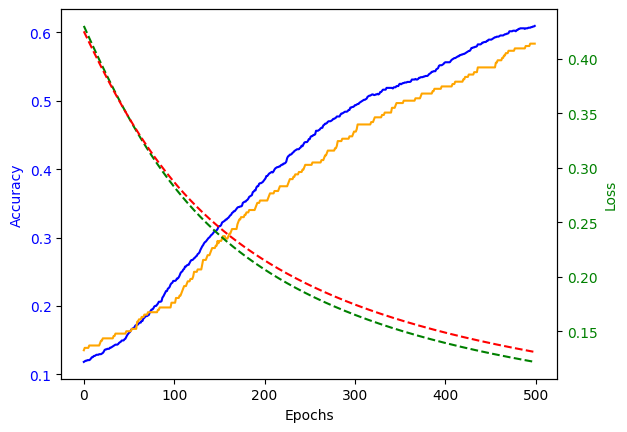

In [5]:
# Define the model
mnist_model = Sequential([
    Dense(32, input_shape=(64,), activation='tanh'),  # hidden layer with 32 neurons and ReLU activation
    Dense(10, activation='tanh')  # output layer with 10 neurons (one for each class) and softmax activation
])

# Compile the model
mnist_model.compile(optimizer=SGD(learning_rate=0.0005), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
mnist_history = mnist_model.fit(X_mnist_train, y_mnist_train, validation_data=(X_mnist_val, y_mnist_val), epochs=500)

# Create a figure and a set of subplots
fig, ax1 = plt.subplots()

# Plot training and validation accuracy
ax1.plot(mnist_history.history['accuracy'], label='Training Accuracy', color='blue')
ax1.plot(mnist_history.history['val_accuracy'], label='Validation Accuracy', color='orange')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()  
ax2.plot(mnist_history.history['loss'], label='Training Loss', linestyle='--', color='green')
ax2.plot(mnist_history.history['val_loss'], label='Validation Loss', linestyle='--', color='red')
ax2.set_ylabel('Loss', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Evaluate the model on MNIST
mnist_accuracy = mnist_model.evaluate(X_mnist_test, y_mnist_test)[1]
print(f"Accuracy on MNIST: {mnist_accuracy}")